# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Asmaul Husnah
- Email: Asmaul2715@gmail.com
- Id Dicoding: asmaul_husnah

## Menentukan Pertanyaan Bisnis


- Pertanyaan 1 : Bagaimana demografi pelanggan yang kita miliki?
- Pertanyaan 2:  Bagaimana performa penyewaan sepeda per bulan dalam 2 tahun terakhir?

## Menyiapkan semua library yang dibutuhkan

In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [321]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [322]:
df_hour= pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/hour.csv')
df_day =  pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/day.csv')

In [323]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [324]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

Menilai Table hour

In [325]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [326]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [327]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())

Jumlah duplikasi:  0


In [328]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [329]:
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

Menilai Table day

In [330]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [331]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [332]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [333]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [334]:
df_day.nunique()

instant       731
dteday        731
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     650
casual        606
registered    679
cnt           696
dtype: int64

### Cleaning Data

Membersihkan table df_hour

In [335]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [336]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Memperbaiki tipe data**

In [337]:
# Konversi kolom 'dteday' menjadi tipe data datetime
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

In [338]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Outliner Analysis**
box plot df_hour

[Text(0.5, 0, 'Temperature'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

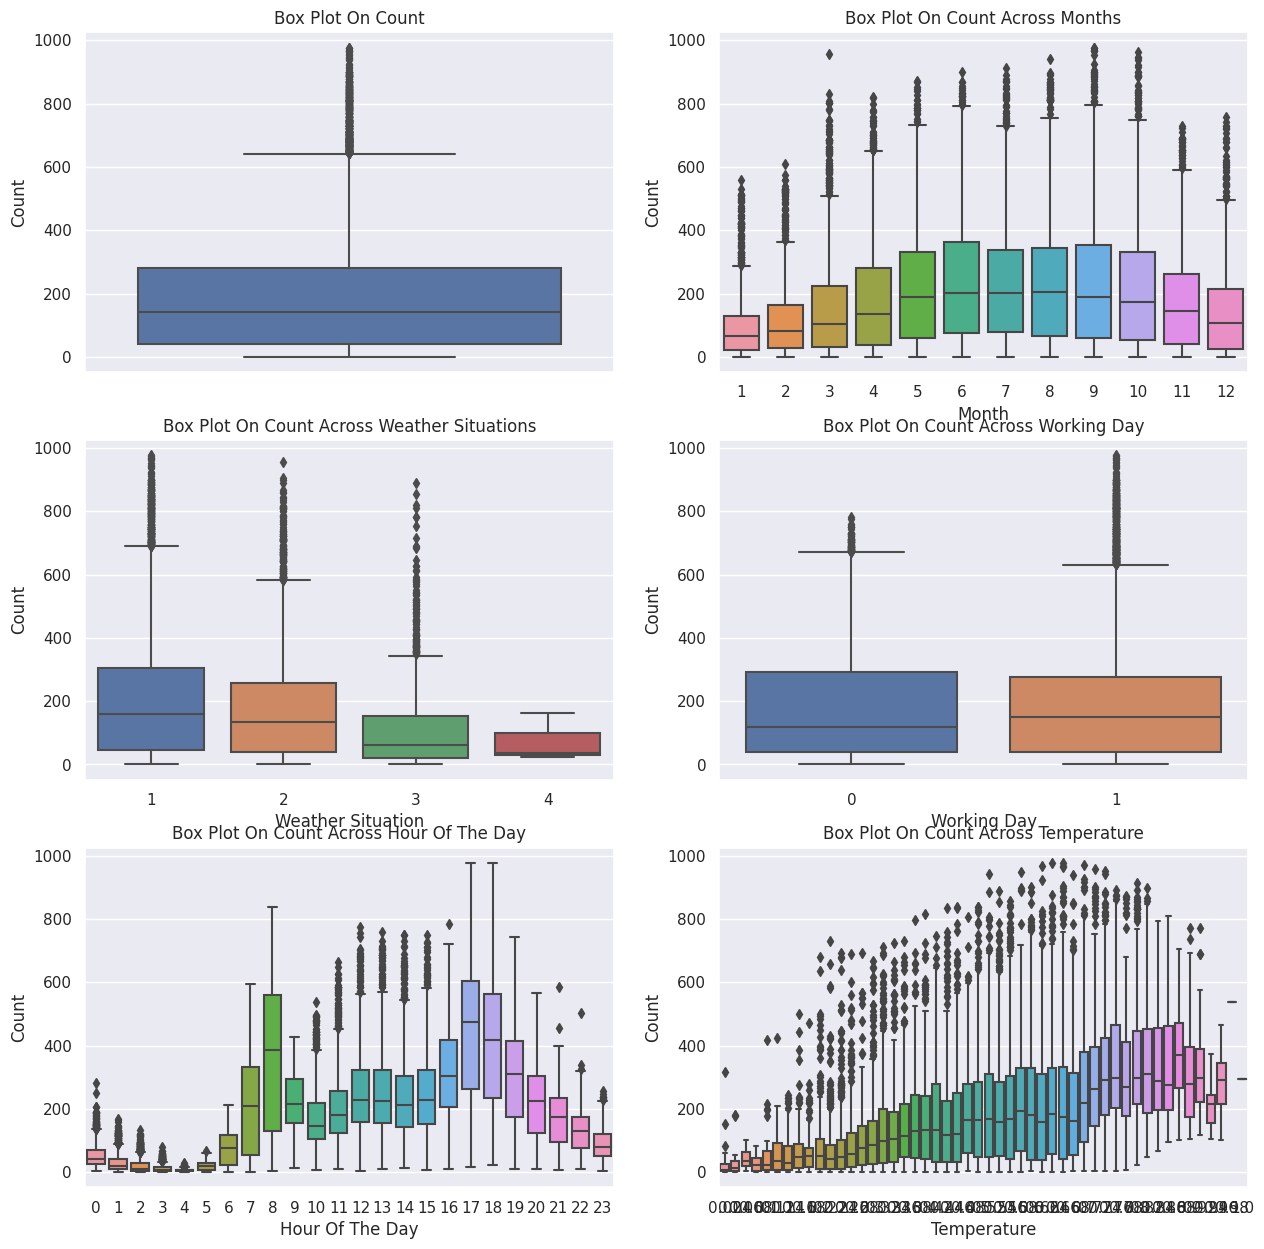

In [339]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=df_hour,y="cnt",orient="v",ax=axes[0][0])
sns.boxplot(data=df_hour,y="cnt",x="mnth",orient="v",ax=axes[0][1])
sns.boxplot(data=df_hour,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=df_hour,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=df_hour,y="cnt",x="hr",orient="v",ax=axes[2][0])
sns.boxplot(data=df_hour,y="cnt",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

Samples in data set with outliers: 17379
Samples in data set without outliers: 16874


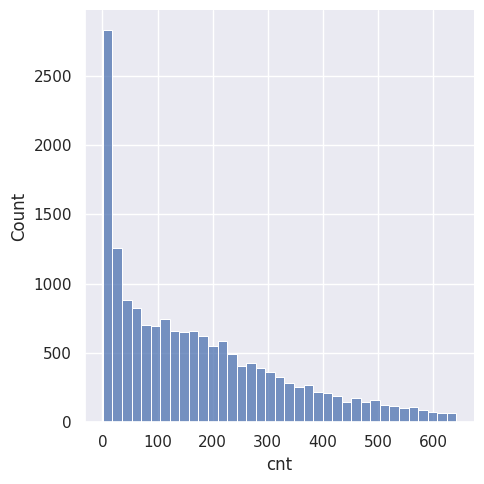

In [340]:
print("Samples in data set with outliers: {}".format(len(df_hour)))

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Removing outliers from "cnt" column
df_hour_filtered = remove_outliers(df_hour, "cnt")

print("Samples in data set without outliers: {}".format(len(df_hour_filtered)))
sns.displot(df_hour_filtered.cnt);

In [341]:
df_hour_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   dteday      16874 non-null  datetime64[ns]
 2   season      16874 non-null  int64         
 3   yr          16874 non-null  int64         
 4   mnth        16874 non-null  int64         
 5   hr          16874 non-null  int64         
 6   holiday     16874 non-null  int64         
 7   weekday     16874 non-null  int64         
 8   workingday  16874 non-null  int64         
 9   weathersit  16874 non-null  int64         
 10  temp        16874 non-null  float64       
 11  atemp       16874 non-null  float64       
 12  hum         16874 non-null  float64       
 13  windspeed   16874 non-null  float64       
 14  casual      16874 non-null  int64         
 15  registered  16874 non-null  int64         
 16  cnt         16874 non-

<ipython-input-342-92fd074fef3f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_hour.corr()


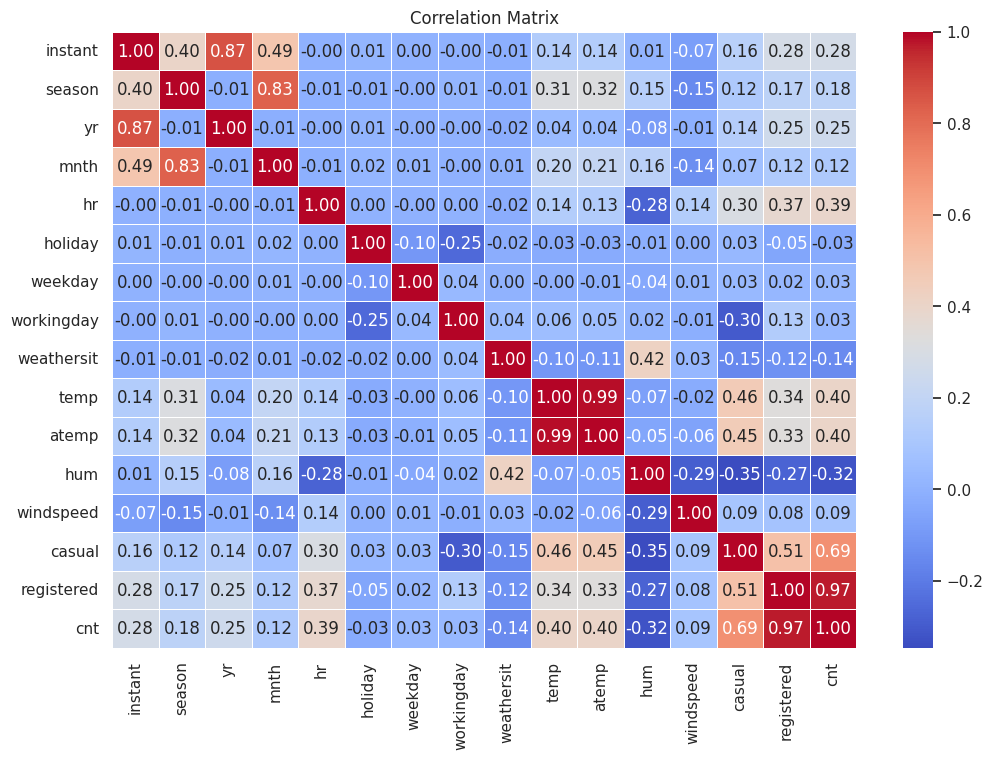

In [342]:
# Calculate the correlation matrix
correlation_matrix = df_hour.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [343]:
# Menghapus fitur "atemp"
df_hour_filtered = df_hour_filtered.drop('atemp', axis=1)


# Menampilkan DataFrame setelah menghapus fitur
print(df_hour_filtered.head())


   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.81        0.0       3          13   16  
1           1  0.22  0.80        0.0       8          32   40  
2           1  0.22  0.80        0.0       5          27   32  
3           1  0.24  0.75        0.0       3          10   13  
4           1  0.24  0.75        0.0       0           1    1  


**Membersihkan table df_day**

In [344]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Memperbaiki Type data

In [345]:
# Konversi kolom 'dteday' menjadi tipe data datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])


In [346]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

 Outliner pada df_day

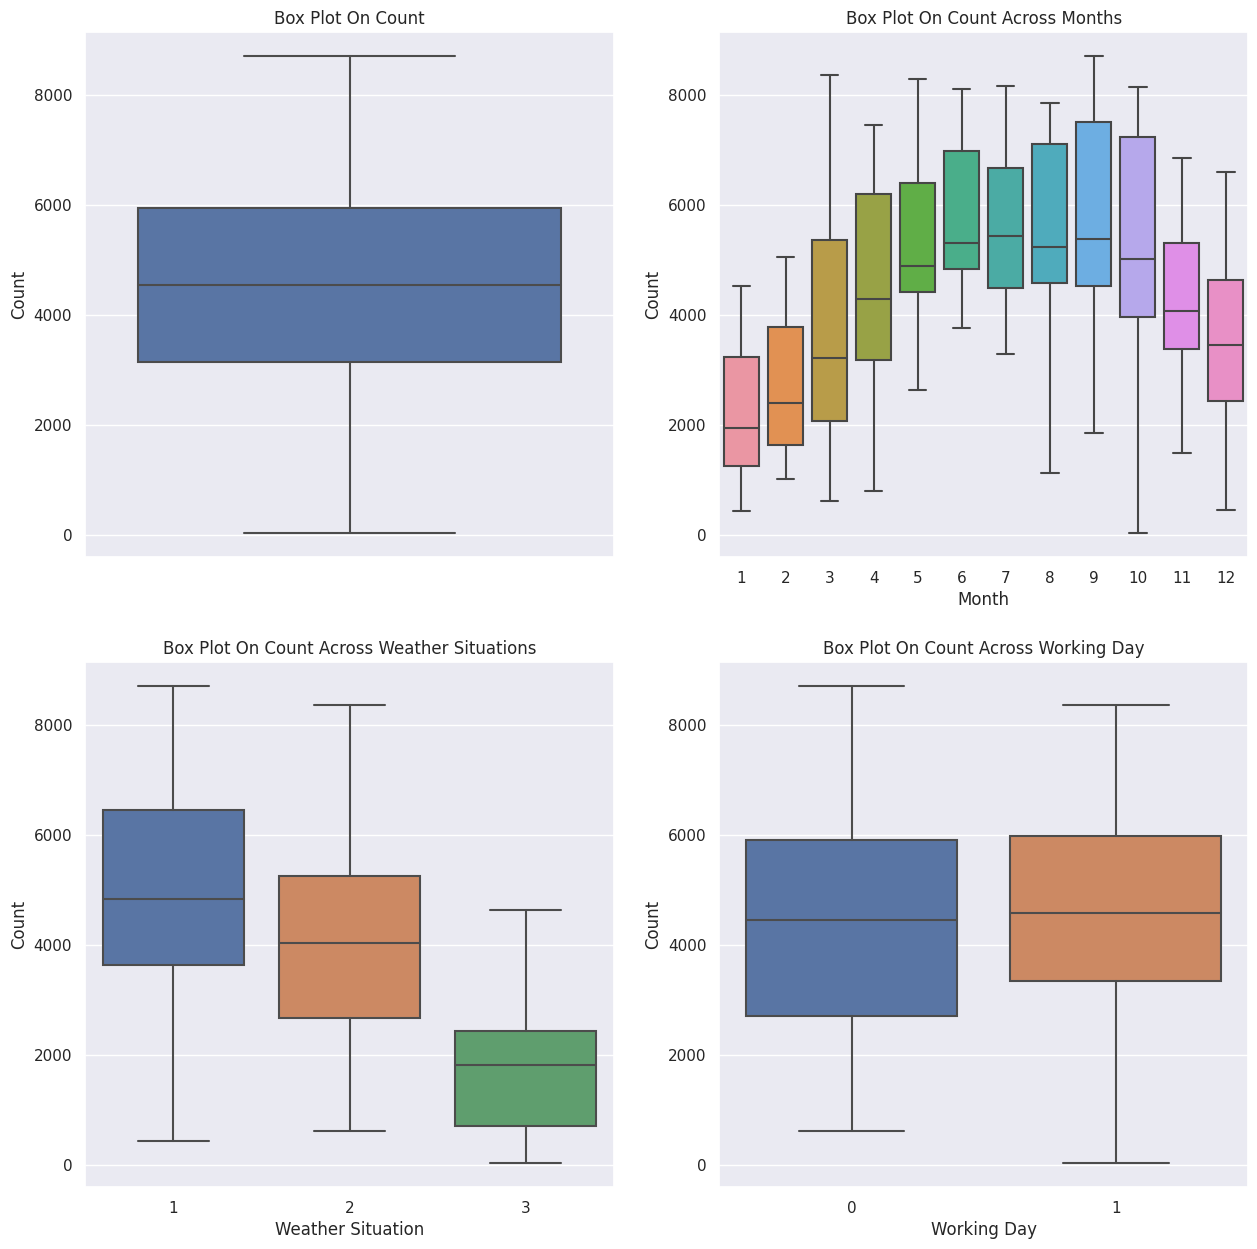

In [347]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15, 15)

sns.boxplot(data=df_day, y="cnt", orient="v", ax=axes[0][0])
sns.boxplot(data=df_day, y="cnt", x="mnth", orient="v", ax=axes[0][1])
sns.boxplot(data=df_day, y="cnt", x="weathersit", orient="v", ax=axes[1][0])
sns.boxplot(data=df_day, y="cnt", x="workingday", orient="v", ax=axes[1][1])

axes[0][0].set(ylabel='Count', title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count', title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count', title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count', title="Box Plot On Count Across Working Day")


plt.show()


Samples in data set with outliers: 731
Samples in data set without outliers: 731


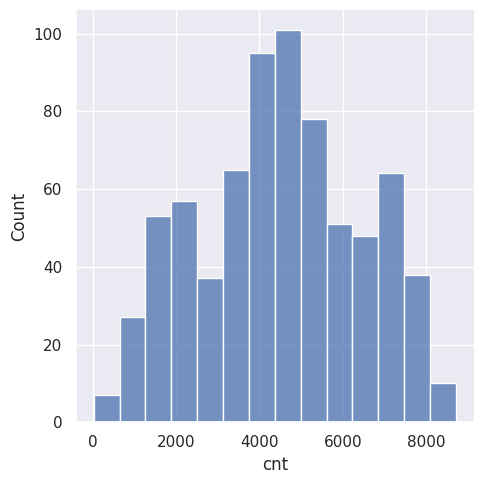

In [348]:
print("Samples in data set with outliers: {}".format(len(df_day)))

# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Removing outliers from "cnt" column
df_day_filtered = remove_outliers(df_day, "cnt")

print("Samples in data set without outliers: {}".format(len(df_day_filtered)))
sns.displot(df_day_filtered.cnt);

<ipython-input-349-97ae1ee95826>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_day.corr()


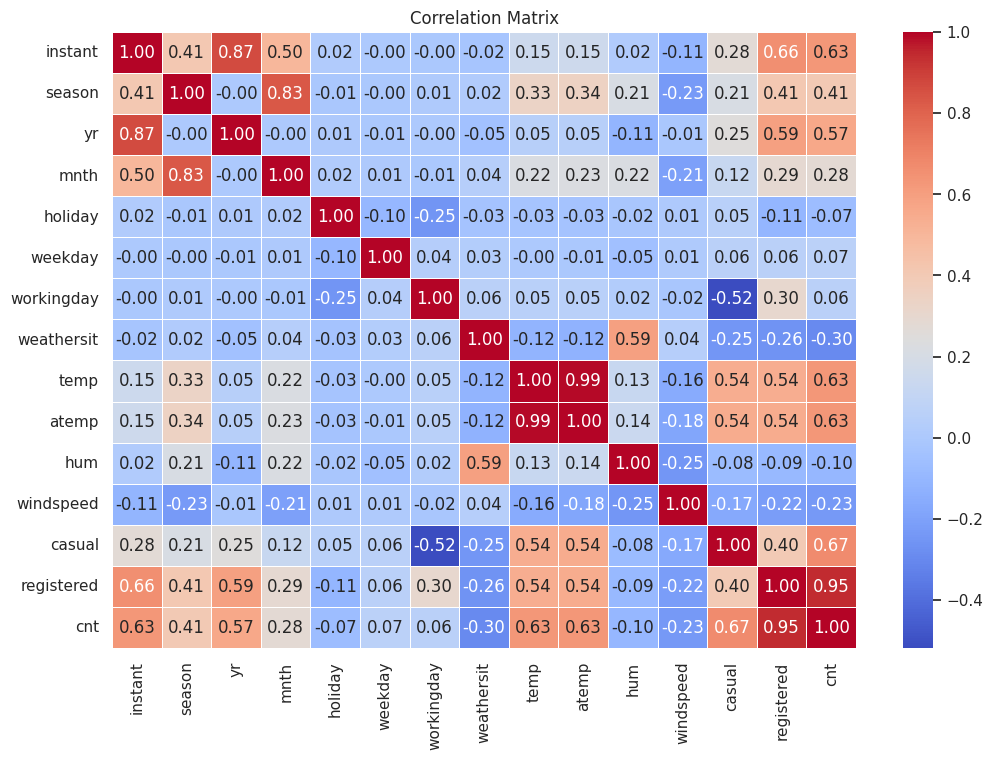

In [349]:
# Calculate the correlation matrix
correlation_matrix = df_day.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [350]:
# Menghapus fitur "atemp"
df_day = df_day.drop('atemp', axis=1)


# Menampilkan DataFrame setelah menghapus fitur
print(df_day.head())


   instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1        0        6           0   
1        2 2011-01-02       1   0     1        0        0           0   
2        3 2011-01-03       1   0     1        0        1           1   
3        4 2011-01-04       1   0     1        0        2           1   
4        5 2011-01-05       1   0     1        0        3           1   

   weathersit      temp       hum  windspeed  casual  registered   cnt  
0           2  0.344167  0.805833   0.160446     331         654   985  
1           2  0.363478  0.696087   0.248539     131         670   801  
2           1  0.196364  0.437273   0.248309     120        1229  1349  
3           1  0.200000  0.590435   0.160296     108        1454  1562  
4           1  0.226957  0.436957   0.186900      82        1518  1600  


In [351]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 85.8 KB


## Exploratory Data Analysis (EDA)

### Explore df_hour

In [354]:
df_hour_filtered.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
16429,16430,2012-11-22,4,1,11,7,1,4,0,1,0.22,0.75,0.1343,7,49,56
14898,14899,2012-09-17,3,1,9,23,0,1,1,3,0.60,0.94,0.2537,4,66,70
9775,9776,2012-02-17,1,1,2,6,0,5,1,2,0.28,0.96,0.1343,1,70,71
6659,6660,2011-10-10,4,0,10,1,1,1,0,1,0.48,0.88,0.0000,4,30,34
13265,13266,2012-07-11,3,1,7,22,0,3,1,1,0.72,0.58,0.2537,41,203,244


In [355]:
df_hour_filtered.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
count,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
mean,8542.168899,2.490399,0.487733,6.513275,11.458101,0.029513,2.997748,0.678618,1.430663,0.492650,0.630412,0.189619,33.418632,139.291514,172.710146
std,5007.766040,1.111966,0.499864,3.462438,6.962144,0.169244,2.013054,0.467021,0.642689,0.192455,0.192600,0.122460,45.896591,126.052802,155.020918
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4219.250000,1.000000,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.480000,0.104500,4.000000,32.000000,38.000000
50%,8438.500000,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.630000,0.179100,15.000000,111.000000,135.000000
75%,12832.750000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.790000,0.253700,45.000000,208.000000,265.750000
max,17379.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,0.850700,354.000000,629.000000,642.000000


In [356]:
df_hour_filtered.sort_values(by="cnt", ascending=False)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
15493,15494,2012-10-12,4,1,10,18,0,5,1,1,0.44,0.38,0.2985,76,566,642
11987,11988,2012-05-19,2,1,5,16,0,6,0,1,0.74,0.30,0.1045,331,311,642
11983,11984,2012-05-19,2,1,5,12,0,6,0,1,0.66,0.36,0.0000,276,366,642
12709,12710,2012-06-18,2,1,6,18,0,1,1,2,0.62,0.69,0.1642,47,595,642
14171,14172,2012-08-18,3,1,8,16,0,6,0,1,0.76,0.37,0.2537,287,354,641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,190,2011-01-09,1,0,1,4,0,0,0,1,0.08,0.53,0.1940,0,1,1
1692,1693,2011-03-16,1,0,3,4,0,3,1,2,0.30,0.93,0.1642,0,1,1
526,527,2011-01-24,1,0,1,1,0,1,1,1,0.04,0.45,0.1940,0,1,1
5549,5550,2011-08-24,3,0,8,3,0,3,1,1,0.58,0.68,0.1343,0,1,1


In [357]:
df_hour_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   dteday      16874 non-null  datetime64[ns]
 2   season      16874 non-null  int64         
 3   yr          16874 non-null  int64         
 4   mnth        16874 non-null  int64         
 5   hr          16874 non-null  int64         
 6   holiday     16874 non-null  int64         
 7   weekday     16874 non-null  int64         
 8   workingday  16874 non-null  int64         
 9   weathersit  16874 non-null  int64         
 10  temp        16874 non-null  float64       
 11  hum         16874 non-null  float64       
 12  windspeed   16874 non-null  float64       
 13  casual      16874 non-null  int64         
 14  registered  16874 non-null  int64         
 15  cnt         16874 non-null  int64         
dtypes: datetime64[ns](1), 

Eksplore by weekday

In [358]:
weekday_df = df_hour_filtered.groupby('weekday').agg({
    "cnt" : "sum"
}).reset_index()

weekday_df.rename(columns={
    "cnt": "Rental_count",
}, inplace=True)

weekday_df

,weekday,Rental_count
0,0,424861
1,1,401536
2,2,403054
3,3,398835
4,4,412505
5,5,437716
6,6,435804


In [359]:
df_hour_filtered.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)

weekday
6    564
0    545
3    535
1    531
5    527
4    523
2    522
Name: cnt, dtype: int64

Eksplore by Season

In [360]:
season_df_hour = df_hour_filtered.groupby('season').agg({
    "cnt" : "sum"
}).reset_index()

season_df_hour.rename(columns={
    "cnt": "Rental_count",
}, inplace=True)

season_df_hour.head()


,season,Rental_count
0,1,457818
1,2,805771
2,3,909146
3,4,741576


In [361]:
df_hour_filtered.groupby(by="season").cnt.nunique().sort_values(ascending=False)

season
2    620
3    613
4    590
1    464
Name: cnt, dtype: int64

**Eksplore by weathersit**

In [362]:
weathersit_df = df_hour_filtered.groupby('weathersit').agg({
    "cnt" : "sum"
}).reset_index()

weathersit_df.rename(columns={
    "cnt": "Rental_count",
}, inplace=True)

weathersit_df

,weathersit,Rental_count
0,1,2042163
1,2,722712
2,3,149213
3,4,223


**by_month**

In [385]:
monthly_rental_df_hour = df_hour_filtered.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})

monthly_rental_df_hour.index = monthly_rental_df_hour.index.strftime('%Y-%m')

monthly_rental_df_hour = monthly_rental_df_hour.reset_index()
monthly_rental_df_hour.rename(columns={
    "dteday": "Rental_date",
    "cnt": "Rental_count",
}, inplace=True)

monthly_rental_df_hour.tail()

,Rental_date,Rental_count
19,2012-08,161241
20,2012-09,146769
21,2012-10,145245
22,2012-11,138423
23,2012-12,114538


### **Explore df_day**

In [363]:
df_day.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
445,446,2012-03-21,2,1,3,0,3,1,2,0.531667,0.821250,0.089558,1122,5108,6230
510,511,2012-05-25,2,1,5,0,5,1,1,0.680000,0.747083,0.140550,1417,5317,6734
71,72,2011-03-13,1,0,3,0,0,0,1,0.384348,0.527391,0.270604,982,1435,2417
96,97,2011-04-07,2,0,4,0,4,1,1,0.437500,0.602917,0.162312,571,2570,3141
195,196,2011-07-15,3,0,7,0,5,1,1,0.663333,0.591250,0.182833,1318,4220,5538


In [364]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 85.8 KB


**Explore by weekday**

In [365]:
weekday_df_day = df_day.groupby('weekday').agg({
    "cnt" : "sum"
}).reset_index()

weekday_df_day.rename(columns={
    "cnt": "Rental_count",
}, inplace=True)

weekday_df_day

,weekday,Rental_count
0,0,444027
1,1,455503
2,2,469109
3,3,473048
4,4,485395
5,5,487790
6,6,477807


In [366]:
df_day.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)

weekday
0    104
1    104
2    104
5    104
3    103
4    103
6    102
Name: cnt, dtype: int64

**Explore by Season**

In [367]:
season_df_day = df_day.groupby('season').agg({
    "cnt" : "sum"
}).reset_index()

season_df_day.rename(columns={
    "cnt": "Rental_count",
}, inplace=True)

season_df_day.head()


,season,Rental_count
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


**Explore by type weathersit**

In [368]:
weathersit_df_day = df_day.groupby('weathersit').agg({
    "cnt" : "sum"
}).reset_index()

weathersit_df_day.rename(columns={
    "cnt": "Rental_count",
}, inplace=True)

weathersit_df_day

,weathersit,Rental_count
0,1,2257952
1,2,996858
2,3,37869


In [369]:
monthly_rental_df = df_day.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})

monthly_rental_df.index = monthly_rental_df.index.strftime('%Y-%m')

monthly_rental_df = monthly_rental_df.reset_index()
monthly_rental_df.rename(columns={
    "dteday": "Rental_date",
    "cnt": "Rental_count",
}, inplace=True)

monthly_rental_df.head()

,Rental_date,Rental_count
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045
3,2011-04,94870
4,2011-05,135821


In [370]:
year_rental_df = df_day.resample(rule='Y', on='dteday').agg({
    "cnt": "sum"
})

year_rental_df.index = year_rental_df.index.strftime('%Y')

year_rental_df = year_rental_df.reset_index()
year_rental_df.rename(columns={
    "dteday": "Rental_date",
    "cnt": "Rental_count",
}, inplace=True)

year_rental_df.head()

,Rental_date,Rental_count
0,2011,1243103
1,2012,2049576


## Visualization & Explanatory Analysis

### Pertanyaan 1:
- Bagaimana demografi pelanggan yang kita miliki?



**Berdasarkan weekday**

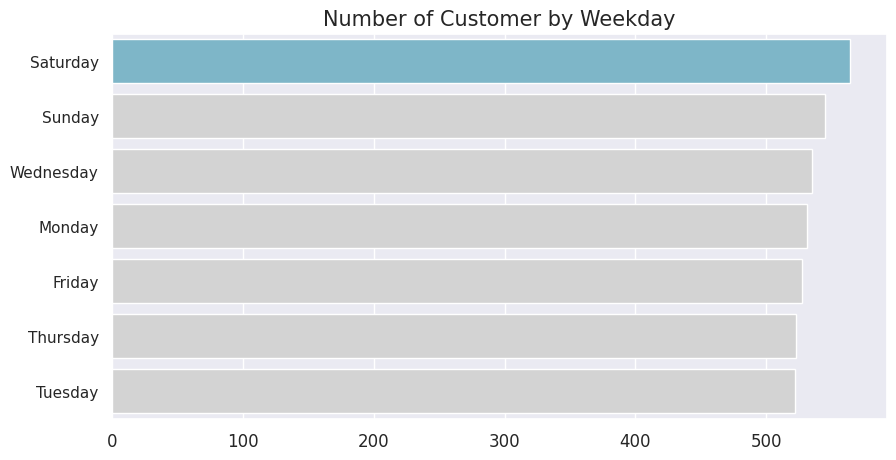

In [371]:

by_week = df_hour_filtered.groupby(by="weekday")['cnt'].nunique().reset_index()
by_week.rename(columns={
    "cnt": "Jumlah_sewa"
}, inplace=True)

# Mapping nilai weekday menjadi nama hari
by_week['weekday'] = by_week['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Membuat bar chart menggunakan Seaborn
sns.barplot(
    y="weekday",
    x="Jumlah_sewa",
    data=by_week.sort_values(by="Jumlah_sewa", ascending=False),
    palette=colors_
)

plt.title("Number of Customer by Weekday", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

**Berdasarkan Season**

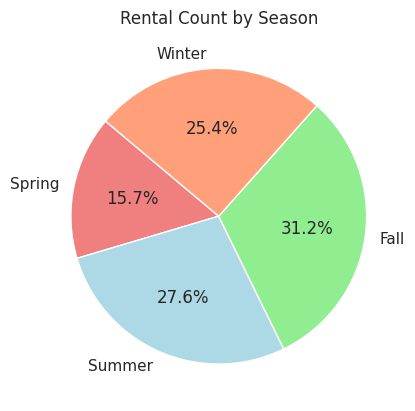

In [372]:
# Mengganti nama musim
season_df_hour['season'] = season_df_hour['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

# Data untuk pie chart
labels = season_df_hour['season']
sizes = season_df_hour['Rental_count']

# Warna yang sesuai dengan jumlah musim
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon']

# Membuat pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Menambahkan judul
plt.title('Rental Count by Season')

# Menampilkan pie chart
plt.show()

**Berdasarkan weathersit**

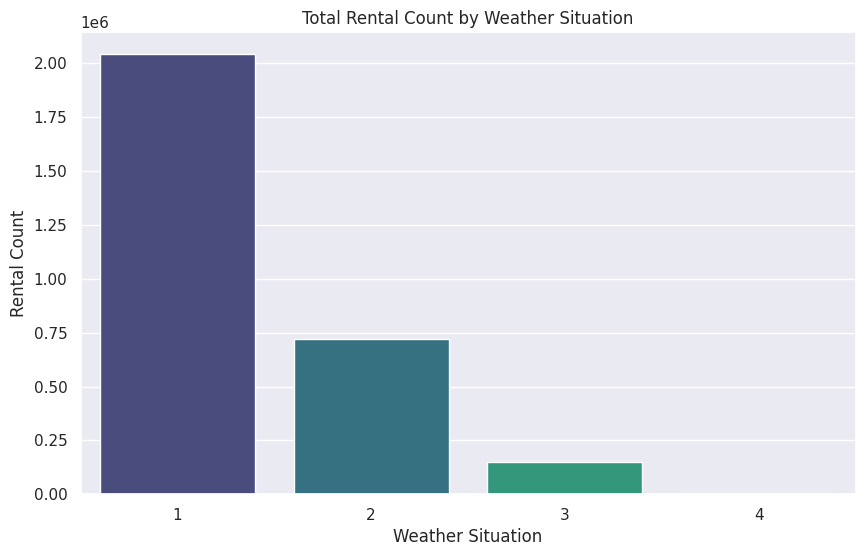

In [373]:
# Membuat bar plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='Rental_count', data=weathersit_df, palette='viridis')
plt.title('Total Rental Count by Weather Situation')
plt.xlabel('Weather Situation')
plt.ylabel('Rental Count')

# Menampilkan plot
plt.show()

### Pertanyaan 2:
- Bagaimana performa penyewaan sepeda dalam beberapa bulan terakhir?

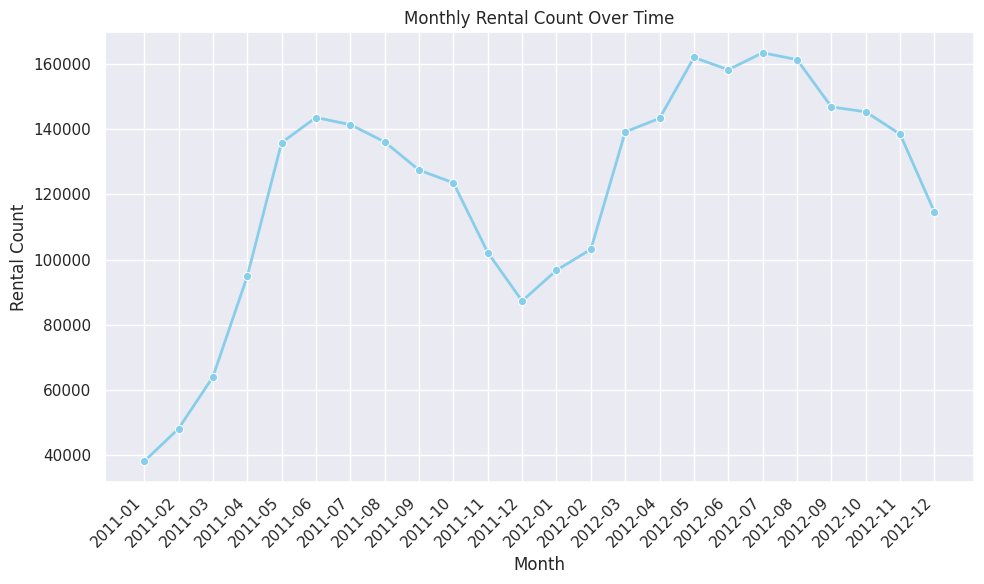

In [383]:
# Plotting using Seaborn line chart
plt.figure(figsize=(10, 6))
sns.lineplot(x='Rental_date', y='Rental_count', data=monthly_rental_df_hour, marker='o', color='skyblue', linewidth=2)
plt.title('Monthly Rental Count Over Time')
plt.xlabel('Month')
plt.ylabel('Rental Count')
plt.xticks(rotation=45, ha='right')  # Rotasi label bulan untuk memudahkan pembacaan
plt.tight_layout()

# Show the plot
plt.show()

In [384]:
df_hour_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16874 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     16874 non-null  int64         
 1   dteday      16874 non-null  datetime64[ns]
 2   season      16874 non-null  int64         
 3   yr          16874 non-null  int64         
 4   mnth        16874 non-null  int64         
 5   hr          16874 non-null  int64         
 6   holiday     16874 non-null  int64         
 7   weekday     16874 non-null  int64         
 8   workingday  16874 non-null  int64         
 9   weathersit  16874 non-null  int64         
 10  temp        16874 non-null  float64       
 11  hum         16874 non-null  float64       
 12  windspeed   16874 non-null  float64       
 13  casual      16874 non-null  int64         
 14  registered  16874 non-null  int64         
 15  cnt         16874 non-null  int64         
dtypes: datetime64[ns](1), 

## Conclusion

- Conclution pertanyaan 1 : Demografi pelanggan yang saya lakukan berdasarkan weekday, season dan weathersit. Dapat dilihat pada visualisasi bedasarkan weekday, jumlah penyewaan paling banyak terjadi pada hari sabtu. Kemudian jika dilihat visualisasi berdasarkan season penyewaan banyak terjadi pada season fall. Terakhir jika dilihat dari visualisasi berdasarkan weathersit paling tinggi penyewaan terjadi pada angka 1 yaitu saat Clear, Few clouds, Partly cloudy, Partly cloudy

- Conclution pertanyaan 2 : Berdasarkan grafik diatas, dapat dilihat penyewaan lebih tinggi pada tahun 2012, kemudian penyewaan banyak dilakukan pada bulan july, setelah itu terjadi penurunan signifikan pada bulan september sampai dengan desember.

In [386]:
# df_hour_filtered.to_csv("df_hour_filtered.csv", index=False)